# Pymaceuticals Inc.
---

### Analysis

- Capomulin, compare to another drug defiantly doing better. But only one drug is doing better than Capomuline which is Ramicane the results for Ramicane is bit better than Capomuline. These two drugs’ results are better than rest of the other drug regime.
Results indicates tumour size decreased with the time.
Males are slightly high risk than female mice for CSS. As the weight increase their tumour size increase as well.
Infubinol is worst performing drug and might have some error in results.

 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy  as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_Study_data = pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
combined_Study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [37]:
# Checking the number of mice.
count_mouse_data = combined_Study_data['Mouse ID'].unique()
len(count_mouse_data)

249

In [38]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
column1 = 'Mouse ID'
column2 = 'Timepoint'
# Use the duplicated method to find rows with duplicate pairs of values in the specified columns
duplicates = combined_Study_data[combined_Study_data.duplicated(subset=[column1, column2], keep=False)][[column1, column2]]
# Drop duplicates from the result to keep unique pairs
unique_duplicate_pairs = duplicates.drop_duplicates()
# Convert the pairs to a list of tuples
duplicate_pairs_list = [tuple(x) for x in unique_duplicate_pairs.values]

# Display the list of unique duplicate pairs
duplicate_pairs_list

[('g989', 0), ('g989', 5), ('g989', 10), ('g989', 15), ('g989', 20)]

In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
df5 = combined_Study_data[combined_Study_data[['Mouse ID', 'Timepoint']].duplicated()]
df5

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_Study_data = combined_Study_data.drop_duplicates(subset =['Mouse ID','Timepoint'],keep='first')
clean_combined_Study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [41]:
# Checking the number of mice in the clean DataFrame.
unique_mice_no=clean_combined_Study_data["Mouse ID"].unique()
len(unique_mice_no)-1

248

## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_drug_df =  clean_combined_Study_data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].mean()
Median = clean_combined_Study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance = clean_combined_Study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_Dev = clean_combined_Study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
std_Dev_err = clean_combined_Study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_summary = pd.DataFrame(grouped_drug_df)
drug_summary["Median Tumor Volume"]=Median
drug_summary['Tumor Volume Variance']=variance
drug_summary['Tumor Volume Std. Dev.']=std_Dev
drug_summary['Tumor Volume Std. Err.']=std_Dev_err

drug_summary.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'}, inplace=True)
drug_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Summary_stats_df=clean_combined_Study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean,np.median,np.std,np.var,st.sem])
Summary_stats_df




,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.393463,50.909965,6.568014,43.138803,0.525862
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_type = clean_combined_Study_data.groupby('Drug Regimen').count()

drug_regimen_type = drug_regimen_type.sort_values(by=['Timepoint'],ascending=False)
drug_regimen_type

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ramicane,228,228,228,228,228,228,228
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Zoniferol,182,182,182,182,182,182,182
Placebo,181,181,181,181,181,181,181
Stelasyn,181,181,181,181,181,181,181
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178


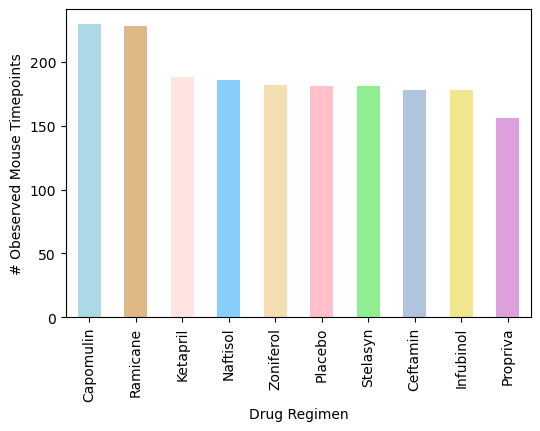

<Figure size 640x480 with 0 Axes>

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

count_chart = drug_regimen_type["Timepoint"].plot(kind='bar', figsize=(6,4), color = ["lightblue", "burlywood", "mistyrose", "lightskyblue", "wheat", "pink", "lightgreen", "lightsteelblue", "khaki", "plum"])

# # # Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("# Obeserved Mouse Timepoints")

plt.show()
plt.tight_layout()

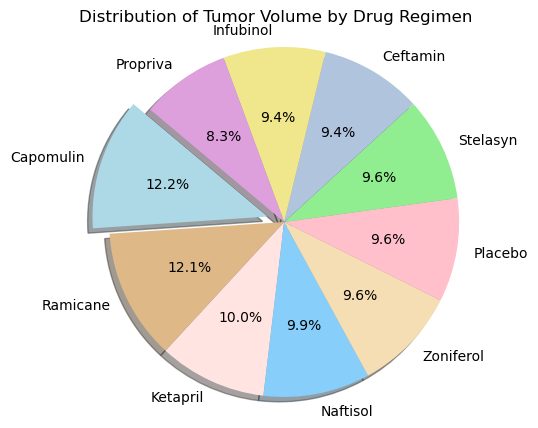

In [46]:
regimen_names = drug_regimen_type.index

# Colors and explode settings
colours = ["lightblue", "burlywood", "mistyrose", "lightskyblue", "wheat", "pink", "lightgreen", "lightsteelblue", "khaki", "plum"]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # Explode the last slice (Propriva) for emphasis

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.title("Distribution of Tumor Volume by Drug Regimen")
plt.pie(drug_regimen_type["Tumor Volume (mm3)"], explode=explode, labels=regimen_names, colors=colours, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_type = clean_combined_Study_data.groupby('Sex').count().reset_index()
gender_type["perc"]=round(gender_type["Mouse ID"]/clean_combined_Study_data["Mouse ID"].count()*100)

gender_type

,Sex,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g),perc
0,Female,930,930,930,930,930,930,930,49.0
1,Male,958,958,958,958,958,958,958,51.0


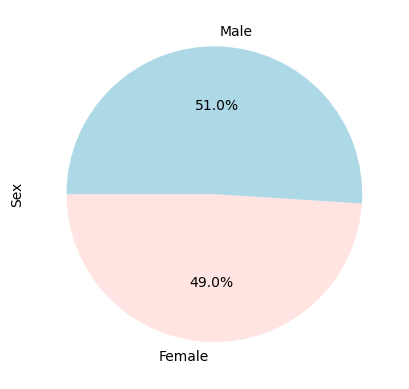

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig,ax=plt.subplots()
colours = ["mistyrose","lightblue"]
ax.pie(gender_type["perc"], labels=gender_type["Sex"], colors=colours, autopct='%1.1f%%', startangle=180)
ax.set_ylabel("Sex")
plt.show()


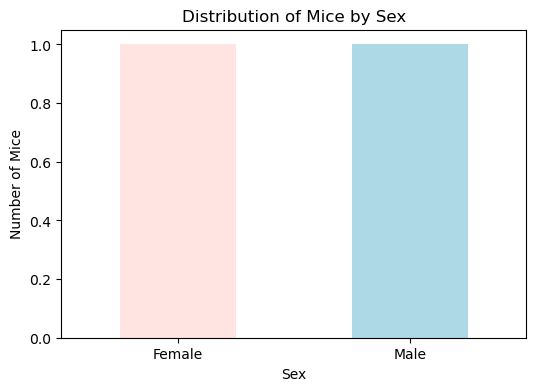

In [49]:
# Extracting data for the bar chart
sex_counts = gender_type.groupby('Sex')['Mouse ID'].count()

# Plotting the bar chart
plt.figure(figsize=(6, 4))
sex_counts.plot(kind='bar', color=['mistyrose','lightblue'])
plt.title('Distribution of Mice by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Mice')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
quart_tumor=clean_combined_Study_data[clean_combined_Study_data["Drug Regimen"].isin(drugs)]

quart_tumor = quart_tumor.groupby('Mouse ID')[["Timepoint"]].max().reset_index()
quart_tumor = pd.merge(quart_tumor,clean_combined_Study_data,  how='inner', left_on=['Mouse ID','Timepoint'], right_on = ['Mouse ID','Timepoint'])

#quart_tumor=pd.concat([quart_tumor,clean_combined_Study_data])quart_tumor
quart_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [51]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
ceftamin=[]
Ramicane=[]
Infubinol=[]
Capomulin=[]

for index,row in quart_tumor.iterrows():
    match row["Drug Regimen"]:
        case "Ceftamin":
            ceftamin.append(row["Tumor Volume (mm3)"])
        case "Ramicane":
            Ramicane.append(row["Tumor Volume (mm3)"])
        case "Infubinol":
            Infubinol.append(row["Tumor Volume (mm3)"])
        case "Capomulin":
            Capomulin.append(row["Tumor Volume (mm3)"])


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
def Outlier(data):
    outliers = []
    sort_data=np.sort(data)
    quantile1,quantile3=np.percentile(sort_data,[25,75])
    lowerq = quantile1
    upperq = quantile3
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
   
    for x in sort_data:
        if ((x> upper_bound) or (x<lower_bound)):
            outliers.append(x)
    return outliers
 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset
print(f"Capomulin's potential outliers : {Outlier(Capomulin)}")
print(f"Ramicane's potential outliers : {Outlier(Ramicane)}")
print(f"Infubinol's potential outliers : {Outlier(Infubinol)}")
print(f"ceftamin's potential outliers : {Outlier(ceftamin)}")
ceftamin

Capomulin's potential outliers : []
Ramicane's potential outliers : []
Infubinol's potential outliers : [36.3213458]
ceftamin's potential outliers : []


[62.99935619,
 45.0,
 56.05774909,
 55.74282869,
 48.72207785,
 47.7846818,
 61.84902336,
 68.92318457,
 67.74866174,
 57.91838132,
 46.78453491,
 59.85195552,
 64.29983003,
 59.74190064,
 61.43389223,
 64.19234114,
 45.0,
 52.92534846,
 45.0,
 67.52748237,
 45.0,
 64.63494887,
 61.38666032,
 68.59474498,
 64.72983655]

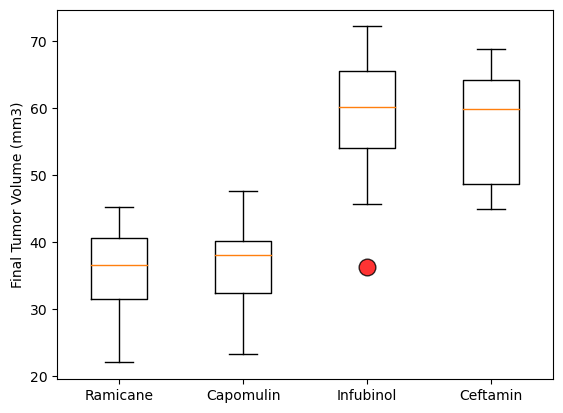

In [52]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')  
boxplot_dict=ax1.boxplot([Ramicane,Capomulin,Infubinol,ceftamin], labels=['Ramicane','Capomulin','Infubinol','Ceftamin'])
for outliers in boxplot_dict['fliers']:
    outliers.set(marker='o', markerfacecolor='red', alpha=0.8, markersize=12)
plt.show()

## Line and Scatter Plots

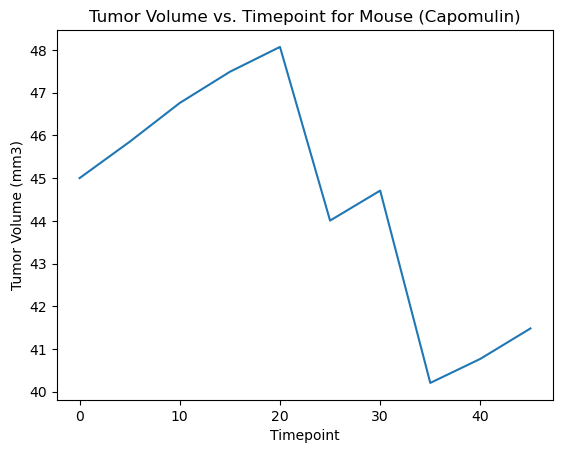

In [53]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_filtered = clean_combined_Study_data[(clean_combined_Study_data['Drug Regimen'] == 'Capomulin') & (clean_combined_Study_data['Mouse ID']=='l509')]
plt.plot(capomulin_filtered['Timepoint'],capomulin_filtered['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Timepoint for Mouse (Capomulin)')

plt.show() 


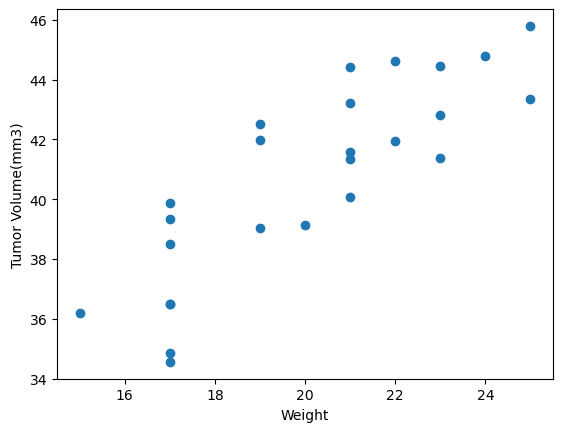

In [54]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

find_regimen = clean_combined_Study_data[(clean_combined_Study_data['Drug Regimen']== 'Capomulin')]
filtered_find_regimen = find_regimen.groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
plt.scatter(filtered_find_regimen.iloc[:,1],filtered_find_regimen.iloc[:,2])
plt.xlabel('Weight')
plt.ylabel('Tumor Volume(mm3)')
plt.show()

## Correlation and Regression

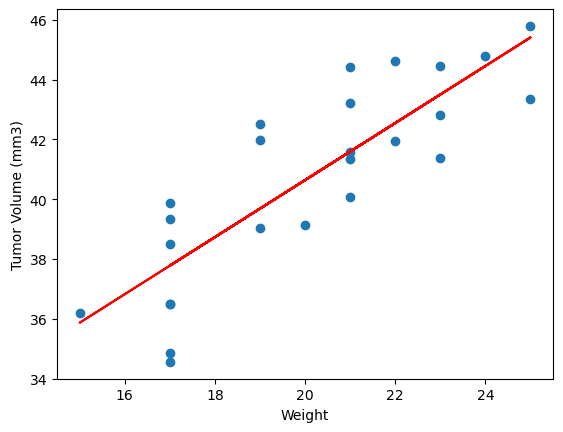

In [55]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = filtered_find_regimen['Weight (g)']
y_values = filtered_find_regimen['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.show()